In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
sys.path.append('./analysis/')

%load_ext autoreload
%autoreload 2
import utils

from utils import domain_to_abbreviated_name, is_industry_domain, is_academic_domain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
lm_metadata = utils.load_annotated_lm_metadata(repo_path=False)

## Counts

In [4]:
# Print counts of each affiliation type
print("Number of tracked academic affilations:", len(utils.academic_domains))
print("Number of tracked industry affilations:", len(utils.industry_domains))

# Print counts of: (1) has any affiliation; (2) academic only; (3) industry only; (4) both (5) no affil
print("Any listed domain:", lm_metadata.domains.apply(lambda x: len(x) > 0).sum(),
        "({:.1f}%)".format(100 * lm_metadata.domains.apply(lambda x: len(x) > 0).sum() / len(lm_metadata)))
print("Any affiliation with >=10 papers:", len(lm_metadata[(lm_metadata.academic) | (lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(lm_metadata.academic) | (lm_metadata.industry)]) / len(lm_metadata)))
print(">= 1 academic:", len(lm_metadata[(lm_metadata.academic)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(lm_metadata.academic)]) / len(lm_metadata)))
print(">= 1 industry:", len(lm_metadata[(lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(lm_metadata.industry)]) / len(lm_metadata)))
print("Academic only:", len(lm_metadata[(lm_metadata.academic) & (~lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(lm_metadata.academic) & (~lm_metadata.industry)]) / len(lm_metadata)))
print("Industry only:", len(lm_metadata[(~lm_metadata.academic) & (lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(~lm_metadata.academic) & (lm_metadata.industry)]) / len(lm_metadata)))
print("Industry-academic:", len(lm_metadata[(lm_metadata.academic) & (lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(lm_metadata.academic) & (lm_metadata.industry)]) / len(lm_metadata)))
print("No affiliation:", len(lm_metadata[(~lm_metadata.academic) & (~lm_metadata.industry)]),
        "({:.1f}%)".format(100 * len(lm_metadata[(~lm_metadata.academic) & (~lm_metadata.industry)]) / len(lm_metadata)))

Number of tracked academic affilations: 281
Number of tracked industry affilations: 41
Any listed domain: 14179 (83.5%)
Any affiliation with >=10 papers: 11688 (68.8%)
>= 1 academic: 10002 (58.9%)
>= 1 industry: 3774 (22.2%)
Academic only: 7914 (46.6%)
Industry only: 1686 (9.9%)
Industry-academic: 2088 (12.3%)
No affiliation: 5291 (31.2%)


In [5]:
# domain_count_df = utils.get_domain_counts_with_affiliation_type(lm_metadata)
# domain_count_df_above_10 = domain_count_df[domain_count_df['count'] >= 10]

# print("Number of tracked academic affilations:", (domain_count_df_above_10['affiliation_type'] == 'academic').sum())
# print("Number of tracked industry affilations:", (domain_count_df_above_10['affiliation_type'] == 'industry').sum())
# print("Number of tracked other affilations:", (domain_count_df_above_10['affiliation_type'] == 'other').sum())

academic_academic_counter = 0
academic_industry_counter = 0
industry_industry_counter = 0

for row in lm_metadata['domains']:
    count_academic = sum([is_academic_domain(x) for x in row])
    count_industry = sum([is_industry_domain(x) for x in row])
    if count_academic >= 2:
        academic_academic_counter += 1
    if count_academic >= 1 and count_industry >= 1:
        academic_industry_counter += 1
    if count_industry >= 2:
        industry_industry_counter += 1
            
print(academic_academic_counter, '# papers with two different academic institutions')
print(academic_industry_counter, '# papers with at least one academic and one industry institution')
print(industry_industry_counter, '# papers with two different industry institutions')

2272 # papers with two different academic institutions
2088 # papers with at least one academic and one industry institution
104 # papers with two different industry institutions


In [6]:
# Print papers with 'openai.com' in domains list
display(lm_metadata[lm_metadata.domains.apply(lambda x: 'openai.com' in x)].sample(5))

,id,authors,title,categories,abstract,versions,first_category,v1_date,LM_related_terms,mentions_LM_keyword,cluster,domains,industry,academic,citationCount,percentile_rank_in_3_month_window,percentile_rank_in_12_month_window
1008,arXiv:1909.08593,"[Daniel M. Ziegler, Nisan Stiennon, Jeffrey Wu...",Fine-Tuning Language Models from Human Prefere...,"[cs.CL, cs.LG, stat.ML]",Reward learning enables the application of r...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 201...",cs.CL,2019-09-18 17:33:39,[language model],True,Human Feedback & Interaction,[openai.com],True,False,408.0,0.927989,0.927596
6992,arXiv:2203.02155,"[Long Ouyang, Jeff Wu, Xu Jiang, Diogo Almeida...",Training language models to follow instruction...,"[cs.CL, cs.AI, cs.LG]",Making language models bigger does not inher...,"[{'version': 'v1', 'created': 'Fri, 4 Mar 2022...",cs.CL,2022-03-04 07:04:42,"[language model, large language model, GPT-3]",True,Prompts & In-Context Learning,[openai.com],True,False,2346.0,0.997218,0.997986
857,arXiv:1908.09203,"[Irene Solaiman, Miles Brundage, Jack Clark, A...",Release Strategies and the Social Impacts of L...,"[cs.CL, cs.AI, cs.CY]",Large language models have a range of benefi...,"[{'version': 'v1', 'created': 'Sat, 24 Aug 201...",cs.CL,2019-08-24 20:41:40,"[language model, large language model, GPT-2]",True,Applications of LLMs/ChatGPT,"[harvard.edu, openai.com]",True,True,252.0,0.888587,0.890710
14120,arXiv:2305.20050,"[Hunter Lightman, Vineet Kosaraju, Yura Burda,...",Let's Verify Step by Step,"[cs.LG, cs.AI, cs.CL]","In recent years, large language models have ...","[{'version': 'v1', 'created': 'Wed, 31 May 202...",cs.LG,2023-05-31 17:24:00,"[language model, large language model]",True,"LLMs, Reasoning, Chain-of-Thought",[openai.com],True,False,30.0,0.976521,0.969581
4915,arXiv:2106.10328,"[Irene Solaiman, Christy Dennison]",Process for Adapting Language Models to Societ...,"[cs.CL, cs.CY]",Language models can generate harmful and bia...,"[{'version': 'v1', 'created': 'Fri, 18 Jun 202...",cs.CL,2021-06-18 19:38:28,"[language model, GPT-3]",True,Toxicity & Hate Speech,[openai.com],True,False,124.0,0.950286,0.957052


## Most prolific institutions

In [7]:
domain_count_df = utils.get_domain_counts_with_affiliation_type(lm_metadata)
# Change allenai.org 'affiliation_type' to non-profit
domain_count_df.loc[domain_count_df['domain'] == 'allenai.org', 'affiliation_type'] = 'non-profit'
domain_count_df

,domain,count,affiliation_type
0,microsoft.com,729,industry
1,google.com,654,industry
2,cmu.edu,359,academic
3,stanford.edu,324,academic
4,tsinghua.edu.cn,324,academic
...,...,...,...
3186,ict.jvn.edu.vn,1,other
3187,rtl.nl,1,other
3188,biba.uni-bremen.de,1,other
3189,lloydsbanking.com,1,other


In [11]:
domain_count_df[domain_count_df['domain'] == 'cuhk.edu']

,domain,count,affiliation_type
32,cuhk.edu,120,academic


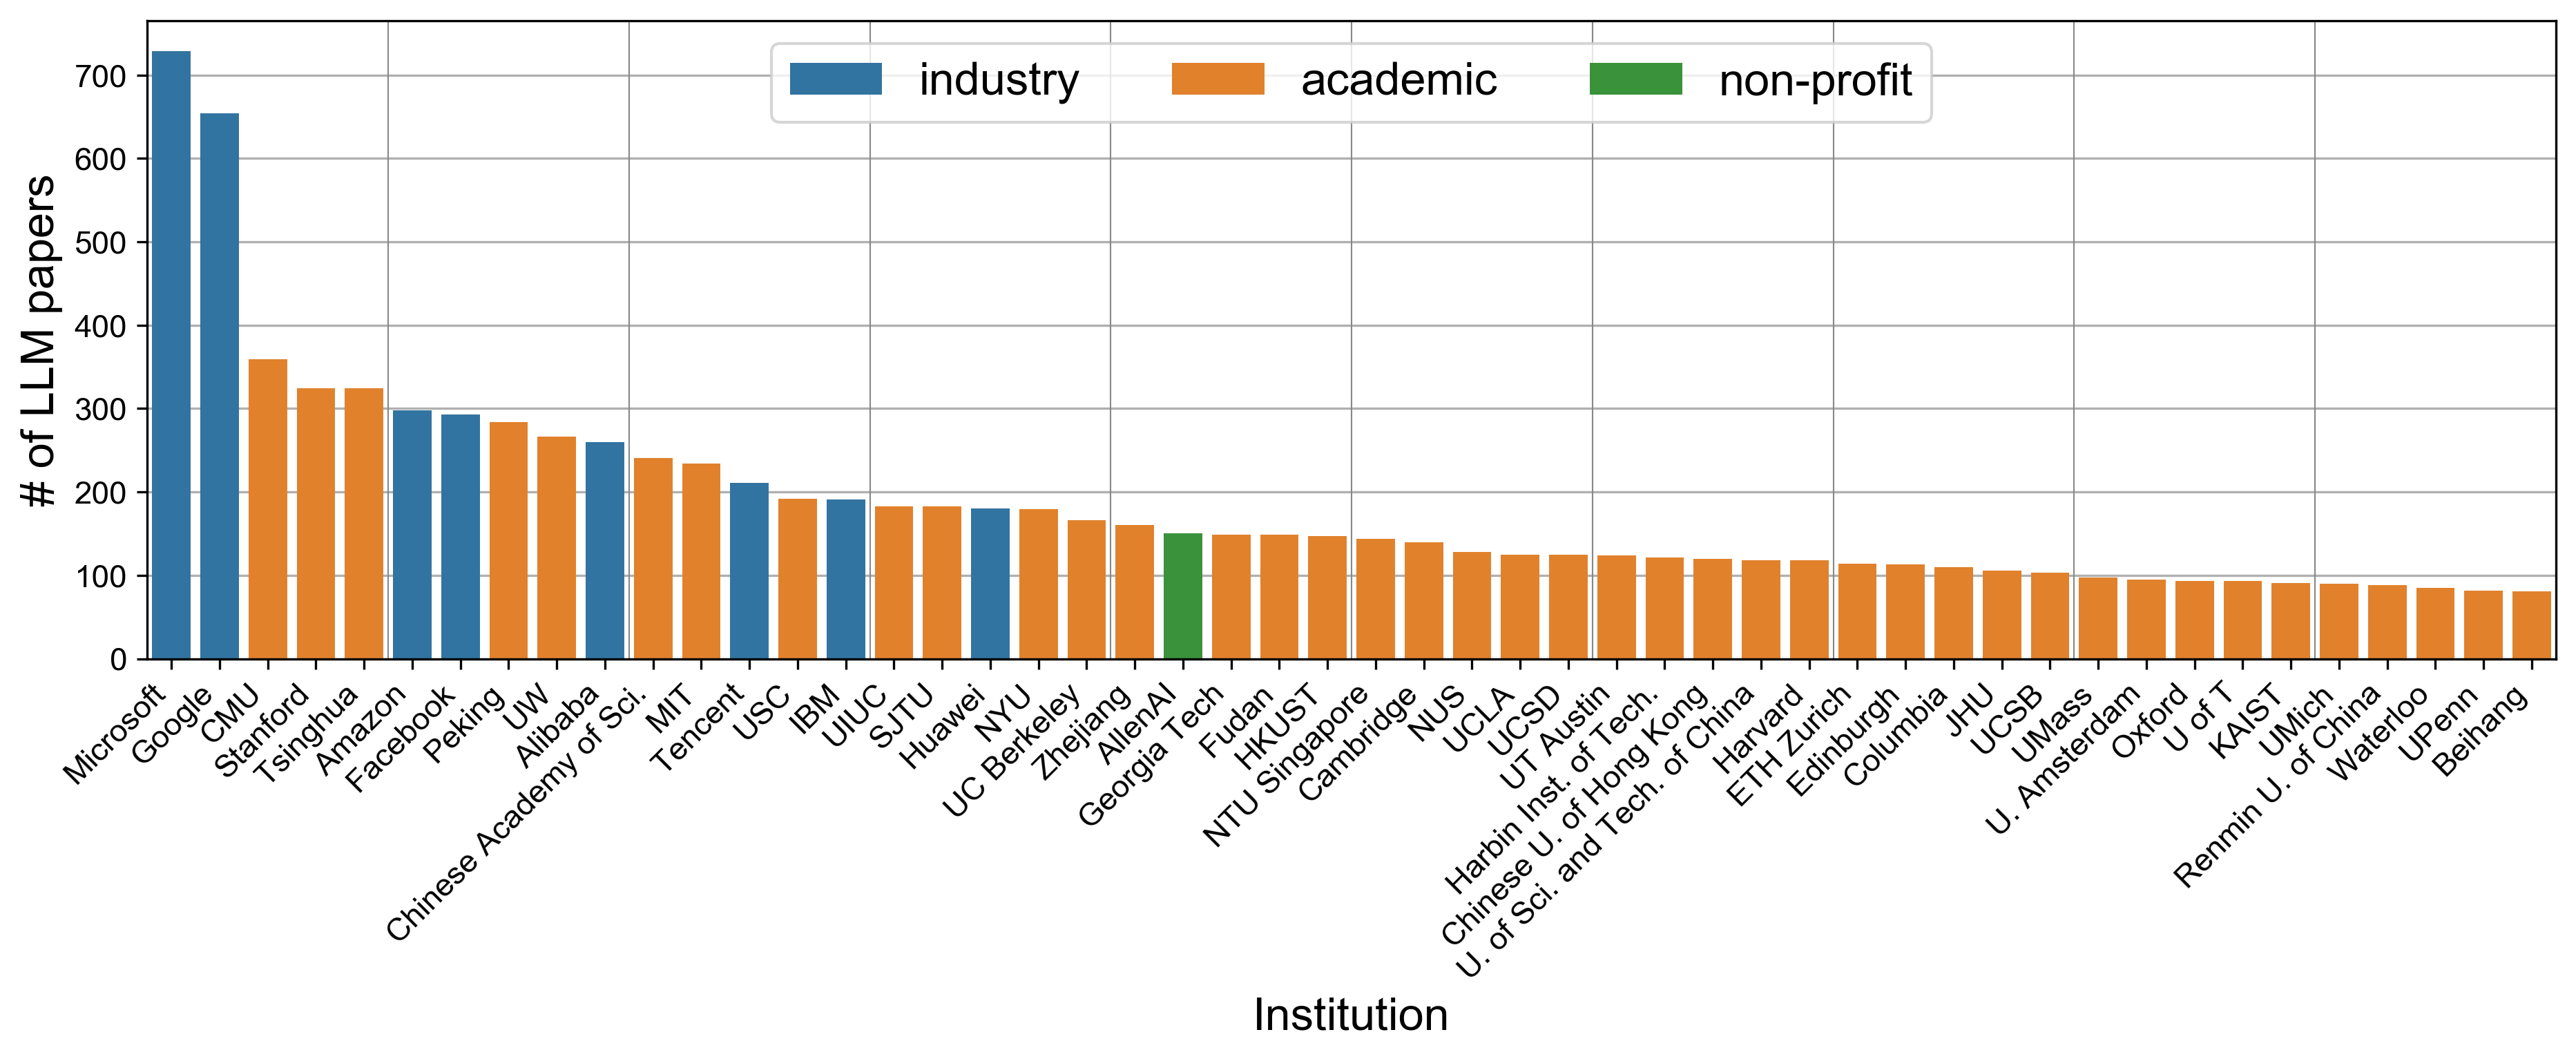

In [15]:
plt.figure(figsize=(15, 4), dpi=300)
n_plot = 50
ax = sns.barplot(x='domain', y='count', data=domain_count_df.head(n_plot), hue='affiliation_type', dodge=False)

# Map existing domains to ticklabels using domain_to_abbreviated_name
ax.set(xticklabels=[domain_to_abbreviated_name[domain] for domain in domain_count_df.head(50)['domain']])
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)

plt.grid(axis='y') # Grid lines, only for y-axis
ax.set_axisbelow(True) # Places grid lines are behind the bars
plt.ylabel('# of LLM papers', fontsize=16)
plt.xlabel('Institution', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.legend(
           loc='upper center', 
           bbox_to_anchor=(0.5, 1),
           ncol=3, 
           fontsize=16, 
          )

# plt.axvline every 5
for i in range(0, 50, 5):
    plt.axvline(i - 0.5, color='#888888', linewidth=0.5)

plt.savefig('./analysis/figures/affiliation_barplot.pdf', bbox_inches='tight')
plt.show()

## Prolific institutions vs. citation counts

In [10]:
top_domains = domain_count_df[domain_count_df['count'] >= 20].copy()

def get_papers_with_domain(domain):
    return lm_metadata[lm_metadata['domains'].apply(lambda domain_list: domain in domain_list)]

top_domains['total_citations'] = top_domains['domain'].apply(lambda domain: get_papers_with_domain(domain).citationCount.sum())
top_domains['median_citations'] = top_domains['domain'].apply(lambda domain: get_papers_with_domain(domain).citationCount.median())
top_domains['count_above_100_citations'] = top_domains['domain'].apply(lambda domain: len(get_papers_with_domain(domain)[get_papers_with_domain(domain).citationCount >= 100]))
top_domains['count_in_top_citation_decile'] = top_domains['domain'].apply(lambda domain: len(get_papers_with_domain(domain)[get_papers_with_domain(domain).percentile_rank_in_3_month_window >= 0.9]))

top_domains['count_rank'] = top_domains['count'].rank(ascending=False, method='min')
top_domains['total_citations_rank'] = top_domains['total_citations'].rank(ascending=False, method='min')
top_domains['median_citations_rank'] = top_domains['median_citations'].rank(ascending=False, method='min')
top_domains['count_above_100_citations_rank'] = top_domains['count_above_100_citations'].rank(ascending=False, method='min')
top_domains['count_in_top_citation_decile_rank'] = top_domains['count_in_top_citation_decile'].rank(ascending=False, method='min')

display(top_domains.head())

,domain,count,affiliation_type,total_citations,median_citations,count_above_100_citations,count_in_top_citation_decile,count_rank,total_citations_rank,median_citations_rank,count_above_100_citations_rank,count_in_top_citation_decile_rank
0,microsoft.com,729,industry,36918.0,8.0,76,118,1.0,4.0,19.0,2.0,2.0
1,google.com,654,industry,130970.0,14.0,116,150,2.0,1.0,7.0,1.0,1.0
2,cmu.edu,359,academic,27547.0,7.0,38,64,3.0,5.0,32.0,4.0,5.0
3,stanford.edu,324,academic,14707.0,9.0,33,72,4.0,7.0,13.0,5.0,4.0
4,tsinghua.edu.cn,324,academic,9521.0,3.0,23,33,4.0,8.0,118.0,8.0,9.0


In [11]:
print_domains = ['allenai.org', 'deepmind.com', 'openai.com']
display(top_domains[top_domains['domain'].isin(print_domains)])

,domain,count,affiliation_type,total_citations,median_citations,count_above_100_citations,count_in_top_citation_decile,count_rank,total_citations_rank,median_citations_rank,count_above_100_citations_rank,count_in_top_citation_decile_rank
21,allenai.org,150,non-profit,24747.0,17.0,27,34,22.0,6.0,4.0,7.0,8.0
92,deepmind.com,46,industry,5107.0,31.5,11,24,89.0,18.0,2.0,15.0,15.0
193,openai.com,21,industry,7515.0,116.0,11,15,191.0,11.0,1.0,15.0,22.0


In [17]:
cornell = lm_metadata[lm_metadata['domains'].apply(lambda domain_list: 'ttic.edu' in domain_list)]
# display top papers sorted by citationCount
display(cornell.sort_values(by='citationCount', ascending=False).head(10))

,id,authors,title,categories,abstract,versions,first_category,v1_date,LM_related_terms,mentions_LM_keyword,cluster,domains,industry,academic,above_pred_female_threshold,inferred_female_frac_nqg_uncertainty_threshold_0.100,citationCount,percentile_rank_in_3_month_window,percentile_rank_in_12_month_window
1054,arXiv:1909.11942,"[Zhenzhong Lan, Mingda Chen, Sebastian Goodman...",ALBERT: A Lite BERT for Self-supervised Learni...,"[cs.CL, cs.AI]",Increasing model size when pretraining natur...,"[{'version': 'v1', 'created': 'Thu, 26 Sep 201...",cs.CL,2019-09-26 07:06:13,[BERT],True,Efficiency & Performance,"[google.com, ttic.edu]",True,True,False,0.000000,4478.0,0.991848,0.991803
154,arXiv:1807.10857,"[Shubham Toshniwal, Anjuli Kannan, Chung-Cheng...",A Comparison of Techniques for Language Model ...,"[eess.AS, cs.AI, cs.CL, cs.SD]",Attention-based recurrent neural encoder-dec...,"[{'version': 'v1', 'created': 'Fri, 27 Jul 201...",eess.AS,2018-07-27 23:33:33,[language model],True,Speech Recognition,"[ttic.edu, google.com]",True,True,True,0.750000,132.0,0.895833,0.845697
2363,arXiv:2007.06778,"[Lifu Tu, Garima Lalwani, Spandana Gella, He He]",An Empirical Study on Robustness to Spurious C...,"[cs.CL, cs.LG]",Recent work has shown that pre-trained langu...,"[{'version': 'v1', 'created': 'Tue, 14 Jul 202...",cs.CL,2020-07-14 02:34:59,"[language model, BERT]",True,Fine-Tuning & Domain Adaptation,"[amazon.com, ttic.edu, nyu.edu]",True,True,True,0.666667,125.0,0.925764,0.919415
6598,arXiv:2201.02184,"[Bowen Shi, Wei-Ning Hsu, Kushal Lakhotia, Abd...",Learning Audio-Visual Speech Representation by...,"[eess.AS, cs.CV, cs.SD]",Video recordings of speech contain correlate...,"[{'version': 'v1', 'created': 'Wed, 5 Jan 2022...",eess.AS,2022-01-05 17:40:45,[BERT],True,Speech Recognition,"[ttic.edu, fb.com]",True,True,False,0.000000,101.0,0.963143,0.978223
30,arXiv:1803.03376,"[Lifu Tu, Kevin Gimpel]",Learning Approximate Inference Networks for St...,"[cs.CL, cs.LG, stat.ML]",Structured prediction energy networks (SPENs...,"[{'version': 'v1', 'created': 'Fri, 9 Mar 2018...",cs.CL,2018-03-09 03:50:24,[language model],True,Efficiency & Performance,[ttic.edu],False,True,False,0.000000,48.0,0.583333,0.675074
6591,arXiv:2201.01763,"[Bowen Shi, Wei-Ning Hsu, Abdelrahman Mohamed]",Robust Self-Supervised Audio-Visual Speech Rec...,"[cs.SD, cs.CV, cs.LG, eess.AS]",Audio-based automatic speech recognition (AS...,"[{'version': 'v1', 'created': 'Wed, 5 Jan 2022...",cs.SD,2022-01-05 18:50:50,[BERT],True,Speech Recognition,"[ttic.edu, fb.com]",True,True,False,0.000000,40.0,0.872740,0.930639
10846,arXiv:2302.00093,"[Freda Shi, Xinyun Chen, Kanishka Misra, Natha...",Large Language Models Can Be Easily Distracted...,"[cs.CL, cs.AI]",Large language models have achieved impressi...,"[{'version': 'v1', 'created': 'Tue, 31 Jan 202...",cs.CL,2023-01-31 20:48:57,"[language model, large language model]",True,"LLMs, Reasoning, Chain-of-Thought","[ttic.edu, google.com]",True,True,False,0.285714,40.0,0.944772,0.979773
893,arXiv:1909.00142,"[Mingda Chen, Zewei Chu, Kevin Gimpel]",Evaluation Benchmarks and Learning Criteria fo...,[cs.CL],Prior work on pretrained sentence embeddings...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 201...",cs.CL,2019-08-31 06:19:42,[BERT],True,"Representations, Syntax, Semantics","[ttic.edu, uchicao.edu]",False,True,False,0.000000,34.0,0.542120,0.554645
2427,arXiv:2007.15353,"[Xin Yuan, Pedro Savarese, Michael Maire]",Growing Efficient Deep Networks by Structured ...,"[cs.LG, stat.ML]",We develop an approach to growing deep netwo...,"[{'version': 'v1', 'created': 'Thu, 30 Jul 202...",cs.LG,2020-07-30 10:03:47,[language model],True,Efficiency & Performance,"[ttic.edu, uchicago.edu]",False,True,False,0.000000,30.0,0.723799,0.669995
7019,arXiv:2203.03929,"[Fatemehsadat Mireshghallah, Kartik Goyal, Arc...",Quantifying Privacy Risks of Masked Language M...,"[cs.LG, cs.AI, cs.CR]",The wide adoption and application of Masked ...,"[{'version': 'v1', '

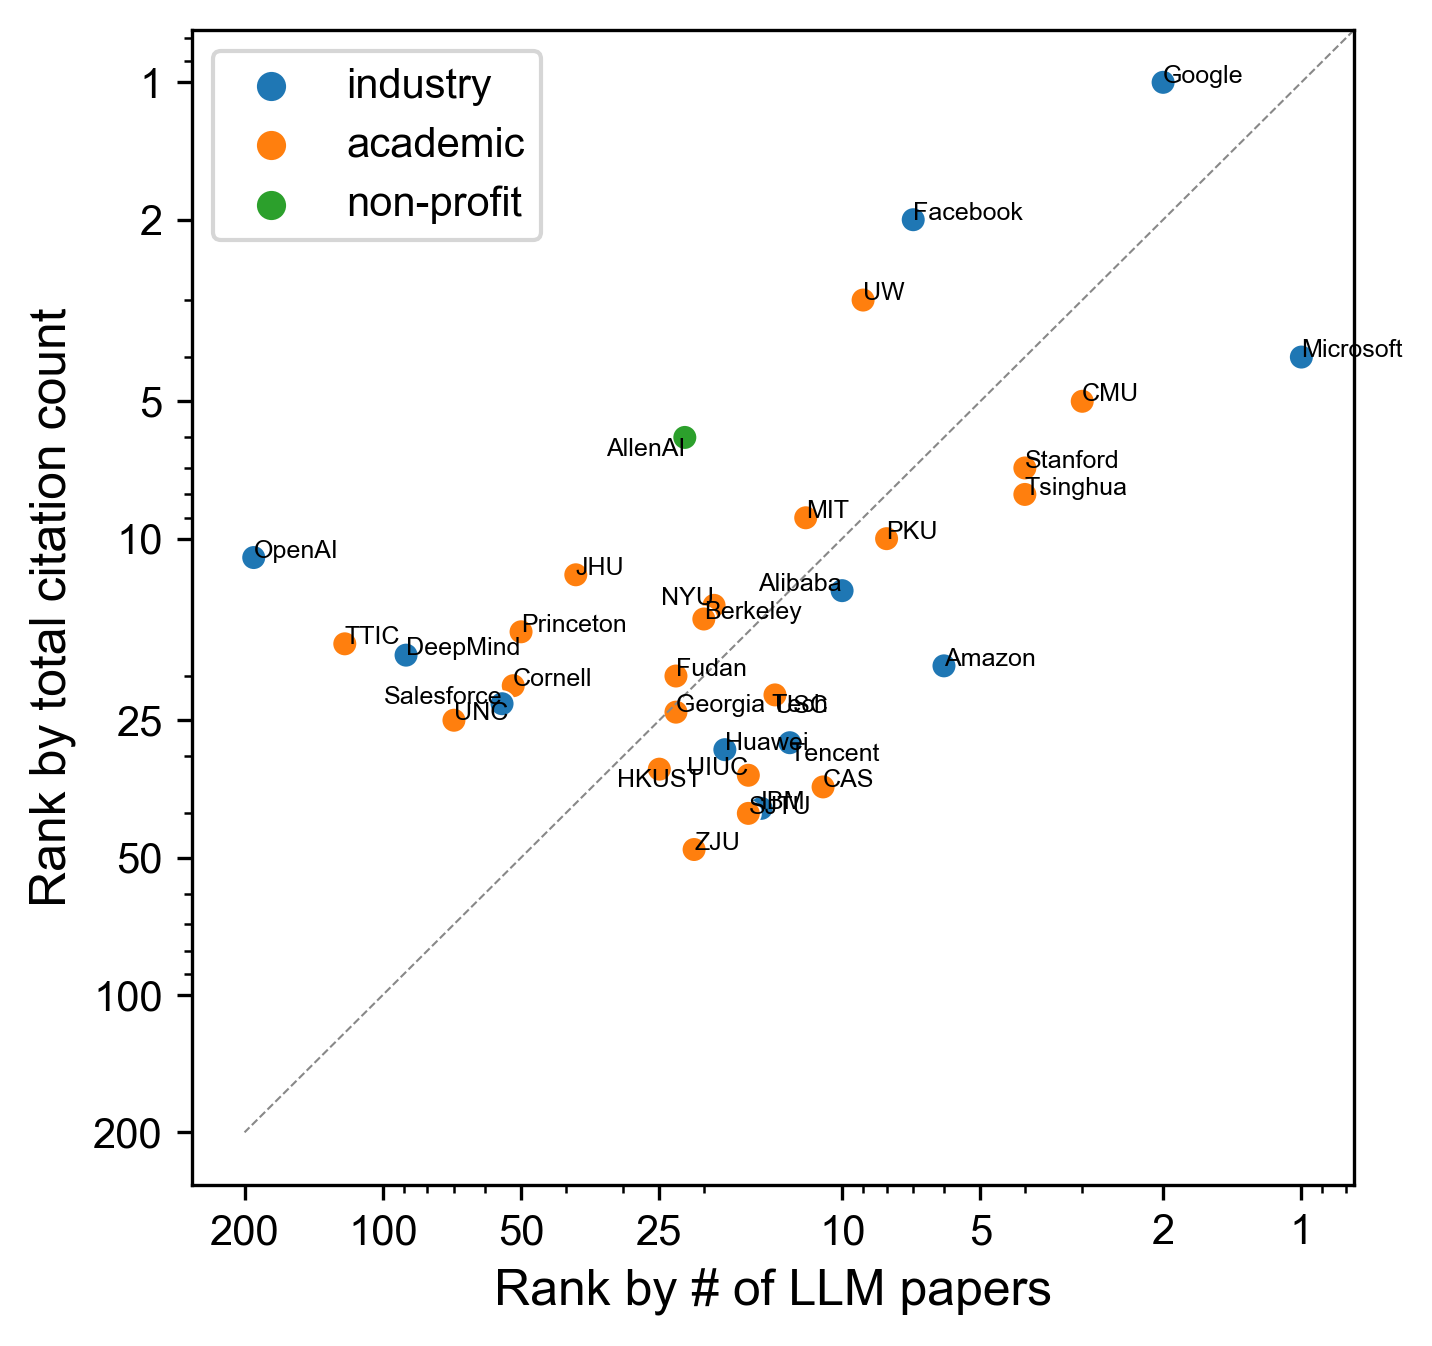

In [20]:
from utils import domain_to_abbreviated_name, domain_to_very_short

# Plot 'count_rank' vs 'total_citations_rank' on a scatterplot for institutions that are in the top 25 for either

top_k = 25

xaxis_col = 'count_rank'
yaxis_col = 'total_citations_rank'
# yaxis_col = 'count_in_top_citation_decile_rank'
# yaxis_col = 'count_above_100_citations_rank'

institutions_to_include = set(top_domains[top_domains[xaxis_col] <= top_k].domain)
institutions_to_include.update(set(top_domains[top_domains[yaxis_col] <= top_k].domain))

plot_df = top_domains[top_domains.domain.isin(institutions_to_include)].copy()

plt.figure(figsize=(5, 5), dpi=300)

ax = sns.scatterplot(x=xaxis_col, y=yaxis_col, data=plot_df, hue='affiliation_type')

# Label each point
align_right = ['USTC', 'NTU', 'HKUST', 'Alibaba', 'NYU', 'UIUC', 'Salesforce', 'AllenAI']
align_top = ['HKUST', 'USC', 'Tencent', 'AllenAI']
for i, row in plot_df.iterrows():
    abbrev = domain_to_very_short[row['domain']]
    ha = 'left'
    va = 'baseline'
    if abbrev in align_right:
        ha = 'right'
    if abbrev in align_top:
        va = 'top'
    if abbrev == 'HKUST':
        ha = 'center'
    # xcoord, ycoord = row[xaxis_col], row[yaxis_col]
    # if abbrev == 'USTC':
    #     xcoord -= 1
    #     ycoord -= 1
    ax.text(row[xaxis_col], row[yaxis_col], abbrev, fontsize=6, ha=ha, va=va)

# # Draw a best fit line to see how points are distributed wrt the average pattern
# sns.regplot(x=xaxis_col, y=yaxis_col, data=plot_df, scatter=False, ax=ax)
# Draw y = x line
plt.plot([0, 200], [0, 200], 
         color='#888888', linewidth=0.5, linestyle='--')

# Axes should be on log scale, but ticklabels should be on linear scale
ax.set_xscale('log')
ax.set_yscale('log')

# Set ticklabels to be linear, add more tick labels
ax.set_xticks([1, 2, 5, 10, 25, 50, 100, 200])
ax.set_xticklabels([1, 2, 5, 10, 25, 50, 100, 200])
ax.set_yticks([1, 2, 5, 10, 25, 50, 100, 200])
ax.set_yticklabels([1, 2, 5, 10, 25, 50, 100, 200])

# Reverse axes so that lower ranks are up and to the right
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])

# Set axis labels
plt.xlabel('Rank by # of LLM papers', fontsize=12)
# plt.ylabel('Rank by # of papers in top 10% of citations', fontsize=12)
plt.ylabel('Rank by total citation count', fontsize=12)

plt.legend(fontsize=10)

# plt.savefig('./analysis/figures/affiliation_count_vs_totalcites_scatterplot.pdf', bbox_inches='tight')
plt.show()

## Collaboration network

In [144]:
from itertools import combinations

# Given a df with a 'domains' column, return a list of vertices and a corresponding adjacency matrix,
# where the weight between two nodes is equal to the number of papers 

def get_weighted_adj_matrix(df, top_n_institutions=10):
    domain_count_df = utils.get_domain_counts_with_affiliation_type(df)
    if top_n_institutions is None:
        top_n_institutions = len(domain_count_df)
    top_domains = domain_count_df.head(top_n_institutions)['domain'].tolist()
    top_domain_counts = domain_count_df.head(top_n_institutions)['count'].tolist()

    vertices = []
    counts = []    
    for i in range(len(top_domains)):
        vertices.append(top_domains[i])
        counts.append(top_domain_counts[i])
    
    adj_matrix = np.zeros((len(vertices), len(vertices)))
    for domains in df['domains']:
        for domain_1, domain_2 in combinations(domains, 2):
            if domain_1 not in vertices or domain_2 not in vertices:
                continue
            i = vertices.index(domain_1)
            j = vertices.index(domain_2)
            adj_matrix[i][j] += 1
            adj_matrix[j][i] += 1
            
    return vertices, counts, adj_matrix

# A list of vertices (domain names) and an adjacency matrix A, return the weight between domain_1 and domain_2
def get_weight(vertices, A, domain_1, domain_2):
    return A[vertices.index(domain_1)][vertices.index(domain_2)]

In [157]:
V, counts, A = get_weighted_adj_matrix(lm_metadata, top_n_institutions=25)

edges = []
for i in range(len(V)):
    for j in range(i + 1, len(V)):
        edges.append((V[i], V[j], A[i][j]))

print("Total number of edges:", len(edges))

k_papers_to_count_collaboration = 5
count_of_collabs_above_k = 0
look_for_edges_with = 'illinois.edu'

edges.sort(key=lambda x: x[2], reverse=True)
for edge in edges:
    if (edge[0] == look_for_edges_with or edge[1] == look_for_edges_with) and edge[2] >= k_papers_to_count_collaboration:
        print(edge)
    if edge[2] >= k_papers_to_count_collaboration:
        count_of_collabs_above_k += 1

print("Total number of collaborations with at least", k_papers_to_count_collaboration, "papers:", count_of_collabs_above_k)

Total number of edges: 300
('microsoft.com', 'illinois.edu', 15.0)
('amazon.com', 'illinois.edu', 12.0)
('google.com', 'illinois.edu', 9.0)
('illinois.edu', 'gatech.edu', 6.0)
('tsinghua.edu.cn', 'illinois.edu', 5.0)
Total number of collaborations with at least 5 papers: 73
